In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm 


In [6]:
ir="/Users/user/Desktop/anacondaJupyter/archive"
print("files in directory:")
os.listdir(dir)
import pandas as pd

file_age = os.path.join(dir, "train_age.csv")
file_gender = os.path.join(dir, "train_gender.csv")

if os.path.exists(file_age) and os.path.exists(file_gender):
    df_age = pd.read_csv(file_age)
    df_gen = pd.read_csv(file_gender)
    print(df_age.head())
    print(df_gen.head())
else:
    print("One or both files do not exist.")
dir="/Users/user/Desktop/anacondaJupyter/archive"
file_age = os.path.join(dir, "train_age.csv")
file_gender = os.path.join(dir, "train_gender.csv")


files in directory:
   imageId   age
0        0  89.0
1        1  72.0
2        2  25.0
3        3  68.0
4        4  37.0
   imageId  gender
0        0       0
1        1       0
2        2       1
3        3       1
4        4       0


In [7]:
im=[]
dir="/Users/user/Desktop/anacondaJupyter/archive/kaggle/kaggle/train"
for i in tqdm(sorted(os.listdir(dir))):
    img_path = os.path.join(dir, i)
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=255-img
    img=cv2.resize(img,(128,128))
    im.append(img)
age=df_age['age']
gen=df_gen['gender']
data={'Image':im,'Age':age,'Gender':gen}




100%|█████████████████████████████████████| 10702/10702 [02:04<00:00, 85.95it/s]


In [8]:
df=pd.DataFrame(data)

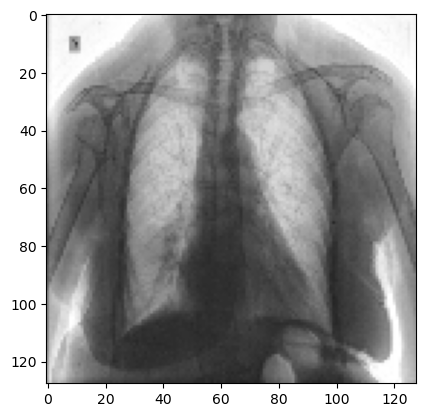

In [11]:
plt.imshow(cv2.cvtColor(df["Image"].iloc[0],cv2.COLOR_BGR2RGB))

In [12]:
X=np.array(data['Image'])
y=np.array(data['Gender'])

X=X.reshape((X.shape[0],X.shape[1],X.shape[2],1))
y=y.reshape(-1,1)
X=X/255
print(X.shape,y.shape)

(10702, 128, 128, 1) (10702, 1)


In [13]:
import tensorflow
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Conv2D,MaxPool2D,Activation,BatchNormalization


In [14]:
def blockc(y,filt,kern):
    x=tensorflow.keras.layers.Conv2D(filt,kern,padding='same')(y)
    x=tensorflow.keras.layers.MaxPool2D(2,strides=2,padding='same')(x)
    x=tensorflow.keras.layers.BatchNormalization()(x)
    x=tensorflow.keras.layers.Activation('relu')(x)
    return x

In [16]:
#define model
tensorflow.keras.backend.clear_session()
model_gender=tensorflow.keras.Sequential()


inp=tensorflow.keras.layers.Input((128,128,1))
c0=tensorflow.keras.layers.Conv2D(4,3,padding='same')(inp)
c0=tensorflow.keras.layers.MaxPool2D(2)(c0)
c1=blockc(c0,16,3)
c2=blockc(c1,32,3)
c3=blockc(c2,64,3)
c4=blockc(c3,128,3)
c5=blockc(c4,64,3)
c6=blockc(c5,32,3)
c6=tensorflow.keras.layers.GlobalAveragePooling2D()(c6)
out=tensorflow.keras.layers.Dense(1,activation='sigmoid')(c6)
model_gender=tensorflow.keras.Model(inputs=[inp],outputs=[out])

In [17]:
model_gender.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gender.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 4)    │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 191,257 (747.10 KB)

 Trainable params: 190,585 (744.47 KB)

 Non-trainable params: 672 (2.62 KB)

In [18]:
history=model_gender.fit(
    X,y,
    steps_per_epoch=(10000//10),
    validation_split=0.2,
    epochs=5
)

Epoch 1/5
 949/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7630 - loss: 0.4851

2024-12-24 10:27:22.296380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.7656 - loss: 0.4813 - val_accuracy: 0.8319 - val_loss: 0.3991
Epoch 2/5
 950/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8821 - loss: 0.2904

2024-12-24 10:27:40.709241: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8826 - loss: 0.2897 - val_accuracy: 0.8482 - val_loss: 0.3599
Epoch 3/5
 951/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9187 - loss: 0.2179

2024-12-24 10:27:58.703068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9188 - loss: 0.2177 - val_accuracy: 0.9033 - val_loss: 0.2458
Epoch 4/5
 949/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9376 - loss: 0.1862

2024-12-24 10:28:15.519523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9377 - loss: 0.1859 - val_accuracy: 0.9332 - val_loss: 0.1609
Epoch 5/5
 950/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9493 - loss: 0.1540

2024-12-24 10:28:32.013559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9490 - loss: 0.1543 - val_accuracy: 0.9608 - val_loss: 0.1181


<Axes: >

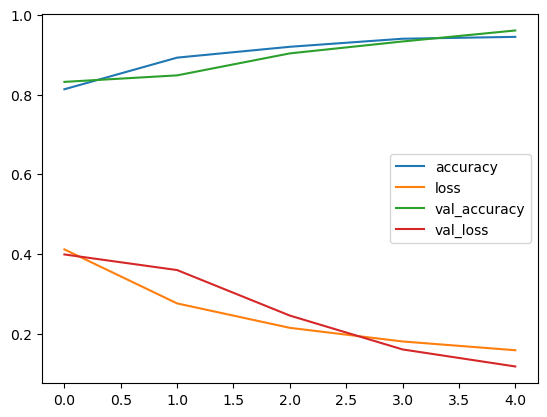

In [19]:
pd.DataFrame(history.history).plot()

In [20]:
model_gender.save('model_gender.h5')

In [21]:
y=np.array(data['Age'])
print(X.shape,y.shape)

(10702, 128, 128, 1) (10702,)


In [22]:
tensorflow.keras.backend.clear_session()
model_age=tensorflow.keras.Sequential()


inp=tensorflow.keras.layers.Input((128,128,1))
c0=tensorflow.keras.layers.Conv2D(4,3,padding='same')(inp)
c0=tensorflow.keras.layers.MaxPool2D(2)(c0)
c1=blockc(c0,16,3)
c2=blockc(c1,32,3)
c3=blockc(c2,64,3)
c4=blockc(c3,128,3)
c5=blockc(c4,64,3)
c6=blockc(c5,32,3)
c6=tensorflow.keras.layers.GlobalAveragePooling2D()(c6)
c7=tensorflow.keras.layers.Flatten()(c6)
c8=tensorflow.keras.layers.Dense(100,activation='linear')(c7)
c9=tensorflow.keras.layers.Dense(50,activation='linear')(c8)
out=tensorflow.keras.layers.Dense(1,activation='linear')(c9)
model_age=tensorflow.keras.Model(inputs=[inp],outputs=[out])

In [23]:
model_age.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
model_age.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 4)    │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 199,625 (779.79 KB)

 Trainable params: 198,953 (777.16 KB)

 Non-trainable params: 672 (2.62 KB)

In [24]:
history=model_age.fit(
    X,y,
    steps_per_epoch=(10000//10),
    validation_split=0.2,
    epochs=10
)

Epoch 1/10
 951/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 617.7755 - mse: 617.7755

2024-12-24 10:35:18.894997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 603.7405 - mse: 603.7405 - val_loss: 186.7244 - val_mse: 186.7244
Epoch 2/10
 949/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 179.2687 - mse: 179.2687

2024-12-24 10:35:36.258099: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - loss: 179.2488 - mse: 179.2488 - val_loss: 122.2908 - val_mse: 122.2908
Epoch 3/10
 951/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 151.3609 - mse: 151.3609

2024-12-24 10:35:52.641940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 151.1272 - mse: 151.1272 - val_loss: 131.9172 - val_mse: 131.9172
Epoch 4/10
 950/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 133.2190 - mse: 133.2190

2024-12-24 10:36:09.425147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - loss: 133.1248 - mse: 133.1248 - val_loss: 84.3324 - val_mse: 84.3324
Epoch 5/10
 949/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 127.1097 - mse: 127.1097

2024-12-24 10:36:25.715993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 126.8604 - mse: 126.8604 - val_loss: 98.9698 - val_mse: 98.9698
Epoch 6/10
 952/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 107.3238 - mse: 107.3238

2024-12-24 10:36:42.397106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - loss: 107.6479 - mse: 107.6479 - val_loss: 221.1255 - val_mse: 221.1255
Epoch 7/10
 950/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 97.3566 - mse: 97.3566

2024-12-24 10:36:59.368836: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - loss: 97.5161 - mse: 97.5161 - val_loss: 67.4509 - val_mse: 67.4509
Epoch 8/10
 951/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 90.7363 - mse: 90.7363

2024-12-24 10:37:15.584427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 90.8398 - mse: 90.8398 - val_loss: 78.4126 - val_mse: 78.4126
Epoch 9/10
 949/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 86.8036 - mse: 86.8036

2024-12-24 10:37:31.968841: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 86.8776 - mse: 86.8776 - val_loss: 109.8414 - val_mse: 109.8414
Epoch 10/10
 949/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 79.8998 - mse: 79.8998

2024-12-24 10:37:48.329217: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 79.8989 - mse: 79.8989 - val_loss: 79.9608 - val_mse: 79.9608


<Axes: >

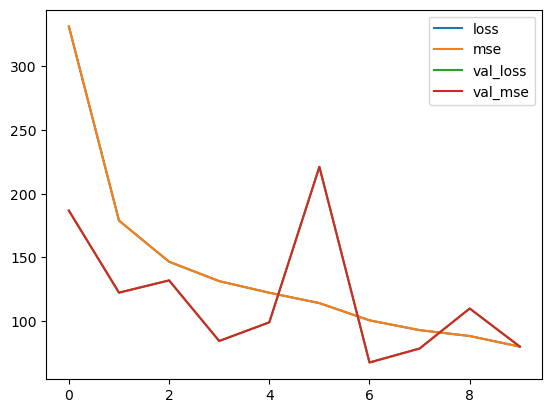

In [25]:
pd.DataFrame(history.history).plot()

In [26]:
model_age.save('model_age.h5')

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
y_pred=model_gender.predict(X)
pred=[]
for i in tqdm(y_pred):
    if i<0.5:
        pred.append(0)
    else:
        pred.append(1)
pred=np.array(pred)

print(pred.shape,y.shape)
print(pred[5:15],gen[5:15])

335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


100%|████████████████████████████████| 10702/10702 [00:00<00:00, 1305626.57it/s]

(10702,) (10702,)
[1 1 1 0 1 1 1 1 0 1] 5     1
6     1
7     1
8     0
9     1
10    1
11    1
12    1
13    0
14    1
Name: gender, dtype: int64


In [28]:
pred=np.round(model_age.predict(X))
print(pred[5:15],age[5:15])

335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
[[69.]
 [50.]
 [46.]
 [68.]
 [43.]
 [83.]
 [64.]
 [63.]
 [74.]
 [37.]] 5     62.0
6     52.0
7     46.0
8     83.0
9     33.0
10    82.0
11    78.0
12    61.0
13    74.0
14    28.0
Name: age, dtype: float64


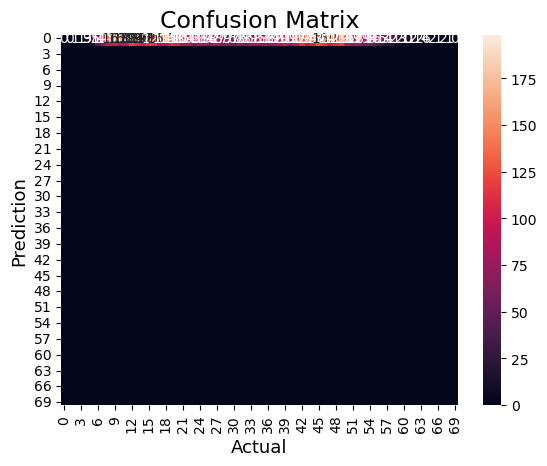

Accuracy: 0.0


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [29]:
import seaborn as sns
cm=confusion_matrix(gen,pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
accuracy=accuracy_score(gen,pred)
print("Accuracy:",accuracy)
precision=precision_score(gen,pred)
print("Precision",precision)
recall=recall_score(gen,pred)
print("Recall:",recall)
F1_score=f1_score(gen,pred)
print("F1-score:",F1_score)

In [30]:
from sklearn.metrics import r2_score

p=model_age.predict(X)
print(r2_score(age,p))

335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
0.7788041934747262
